## Preparation

<p>On commence par importer des packages necessaires. Si vous utilisez <b>tensorflow.compat.v1</b>, vous devez desactiver eager_execution. Notez que le package <b>tensorflow</b> n'a pas la fonction <b><i>disable_eager_execution</i></b> </p>

In [74]:
import tensorflow as tf
#import tensorflow.compat.v1 as tf
#tf.disable_eager_execution()
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D 

In [75]:
import numpy as np      # linear algebra
import pandas as pd     # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [76]:
%matplotlib inline

<p>Pour eviter le download de data plusieurs fois, on les sauvegarde dans une repertoire local. Ceci pourrait differente pour different personne. Donc changez la valeur de variable <b><i>data_dir</i></b> si necessaire</p>

In [77]:
# download the data from web and saved to local directory
# put the data in a variable make the following code usable for any data sources
# Original data is hold by df
data_dir = "C:\\Users\\jeang\\Documents\\BDEB\\A62\\ProSyn3\\data\\fer2013.csv"
##data_dir  = "C:\\Users\\Nisha Haulkhory\\Desktop\\projet de synthese\\fer2013.csv"

## Exploration des donnees

<p>On charge les donnees dans une variable <b><i>df</i></b></p>

In [78]:
# Original data is hold by df
df = pd.read_csv(data_dir )
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [79]:
print(f"Le dataset a {df.shape[0]} lignes et {df.shape[1]} colonnes.")

Le dataset a 35887 lignes et 3 colonnes.


<p>Pour connaitre les differentes valeurs dans la colonne <b>Usage</b></P 

In [80]:
split = list(set(df['Usage']))
print(f"Le dataset a comme Usage ces valeurs: {split}")

Le dataset a comme Usage ces valeurs: ['PublicTest', 'Training', 'PrivateTest']


<p>On partage les donnees en 3 parties selons les valeurs d'<b><i>Usage</i></b></P>

In [81]:
df_training = df[df['Usage']=='Training']
df_PublicTest = df[df['Usage']=='PublicTest']
df_PrivateTest = df[df['Usage']=='PrivateTest']

<p>Une partition des donnees pourrait etre desastreuse si la distribution de la cible est differente pour ces trois parties. Pour savoir si nos trois parties sont bien equilibre, nous allons charger quatre variables pour la distribution de la cible dans les donnees originals, et dans ces trois parties</P>

In [14]:
rdf = df.emotion.value_counts(normalize=True)
rdf_training = df_training.emotion.value_counts(normalize=True)
rdf_PublicTest = df_PublicTest.emotion.value_counts(normalize=True)
rdf_PrivateTest = df_PrivateTest.emotion.value_counts(normalize=True)

In [30]:
trainset_keep_same_ratio = all(rdf.index==rdf_training.index)
publicset_keep_same_ratio = all(rdf.index==rdf_PublicTest.index)
privateset_keep_same_ratio = all(rdf.index==rdf_PrivateTest.index)

<p><ul><li>La meilleurs situation est pour le senario lorsque ces trois parties ont relativement la meme distribution que les donnees avant la partition. Si c'est le cas, on affiche une DataFrame de la distribution des cibles pour ces quatre variables</li><li>Si jamais une partie n'a pas la meme distribution que les donnees originals, on affiche les autres parties dans le DataFrame. La distribution de cette partie sera affiche en comparant avec celle des donnees originals</li><li>Si jamais deux parties ou plus n'ont pas la meme distribution que les donnees originals, on affiche ces quatre distributions separativement</li></ul></P>

In [82]:
if all([trainset_keep_same_ratio, publicset_keep_same_ratio, privateset_keep_same_ratio]):
    print("\nOn a relativement une bonne partition:")
    print(pd.DataFrame({"origine":rdf.values, "train_set":rdf_training.values, "public_set":rdf_PublicTest.values, "private_set":rdf_PrivateTest.values}, index=rdf.index))
elif all([trainset_keep_same_ratio, privateset_keep_same_ratio]):
    print("\nTrain_set et private_test_set ont relativement la même partition:")
    print(pd.DataFrame({"origine":rdf.values, "train_set":rdf_training.values, "private_set":rdf_PrivateTest.values}, index=rdf.index))
    print("Public_test_set a une partition différente:\nOriginal\n", rdf, "\nPublicTest\n", rdf_PublicTest)
elif all([trainset_keep_same_ratio, publicset_keep_same_ratio]):
    print("\nTrain_set et public_test_set ont relativement la même partition:")
    print(pd.DataFrame({"origine":rdf.values, "train_set":rdf_training.values, "public_set":rdf_PublicTest.values}, index=rdf.index))
    print("Private_test_set a une partition différente:\nOriginal\n", rdf, "\nPrivate Test\n", rdf_PrivateTest)          
elif all([publicset_keep_same_ratio, privateset_keep_same_ratio]):
    print("\nPublic test set and private test set have relatively the same data partition:")
    print(pd.DataFrame({"origine":rdf.values, "PublicTest":rdf_PublicTest.values, "PrivateTest":rdf_PrivateTest.values}, index=rdf.index))
    print("Train_set a une partition différente:\nOriginal\n", rdf, "\nTraining\n", rdf_training)
else:          
    print("La partition des données n'est pas correctement effectuée!")
    print("\nOriginal\n", rdf, "\nTraining\n", rdf_training, "PublicTest\n", rdf_PublicTest, "PrivateTest\n", rdf_PrivateTest)


Train_set et private_test_set ont relativement la même partition:
    origine  train_set  private_set
3  0.250481   0.251315     0.244915
6  0.172709   0.172942     0.174422
4  0.169337   0.168240     0.165506
2  0.142698   0.142708     0.147116
0  0.138017   0.139155     0.136807
5  0.111517   0.110453     0.115910
1  0.015242   0.015187     0.015325
Public_test_set a une partition différente:
Original
 3    0.250481
6    0.172709
4    0.169337
2    0.142698
0    0.138017
5    0.111517
1    0.015242
Name: emotion, dtype: float64 
PublicTest
 3    0.249373
4    0.181945
6    0.169128
2    0.138200
0    0.130120
5    0.115631
1    0.015603
Name: emotion, dtype: float64


<p>Nous constatons que:<tr><ol><li>La distribution est relativement bien dans les trois parties</li><li>Les images de categorie 4 sont un peu plus nombreuses dans la partie <b>PublicTest</b> que les donnees originals</li><li>Ceci est tolerable pour une telle partition</li></p>

<p>Nous allons continuer l'exploration des donnees.<br>On verifie les datatype de donnees, les valeurs manquantes, les valeurs aberantes</p>

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1   pixels   35887 non-null  object
 2   Usage    35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


<p>Pour connaitre la structure des donnees dans la colonne <b>pixels</b>, une colonne,<b>length</b>, est ajoute qui est le nombre des chiffres sur chaque ligne</P>

In [84]:
df['length'] = df.pixels.apply(lambda x: len(str(x).split(' ')))
df.head()

,emotion,pixels,Usage,length
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training,2304
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training,2304
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training,2304
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training,2304
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training,2304


<p>Pour verifier si toutes les lignes ont la meme longeur ou s'il y a des valeurs manquantres</P>

In [85]:
normal_length = 2304  
no_data = sum(df.length.isna())
anormal = sum([df.length[i] != normal_length for i in range(df.shape[0])])
print(f"valeur manquant, valeur different = {no_data, anormal}")

valeur manquant, valeur different = (0, 0)


* Nous constatons que Les données n'ont pas de valeur manquante
* La distribution des emotions montre qu'il y a plus de catégorie 3 et moins de catégorie 1

## Points particulier¶

<p>La cible, la colonne <b>emotion</b>, merite une attention particulier.</P>

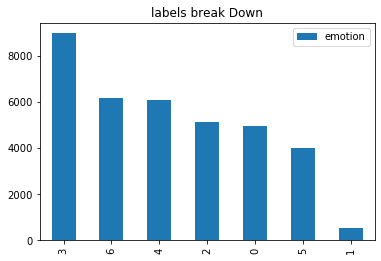

In [39]:
lab = pd.DataFrame(df.emotion.value_counts())
lab.plot.bar(title="labels break Down")

* Les données contient essentiellement deux colonnes: emotion est la cible (catégories) et pixels l'image 48x48 = 2304
* L'autre colonne, Usage, est une parition des données: Training, PublicTest, PrivateTest
* Nous allons utiliser la partie Training pour developper le modele et PrivateTest pour tester notre modele
* En fin, la partie PublicTest sera utilisée pour la validation

<p> Maintenant, nous allons definir des fonctions pour afficher un image (une ligne quelquonque)<br>Notons que 48 x 48 = 2304</p>

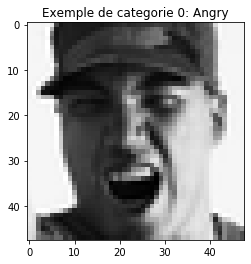

In [86]:
import numpy as np
import matplotlib.pyplot as plt

FER2013_WIDTH = 48
FER2013_HEIGHT = 48

# indices 0 - 6 correspondent emotions suivantes
Emotions = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]  

def string_to_image(str_in):
    return np.reshape(str_in.split(" "), (FER2013_WIDTH, FER2013_HEIGHT)).astype("float")

def fer2013_show_instance(index, d=df):
    """Shows the image and the emotion label of the index's instance."""
    category, str_image = d.at[index,'emotion'], d.at[index,'pixels']
    image = string_to_image(str_image)
    plt.imshow(image, cmap="gray")
    plt.title(f"Exemple de categorie {category}: {Emotions[category]}")
    
fer2013_show_instance(np.random.randint(0,len(df_training)))

<p>Nous voulons aussi savoir les differentes expressions d'emotions pour les sept categories</p>

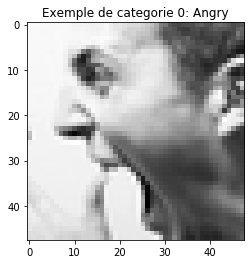

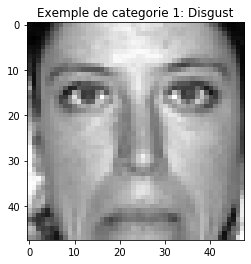

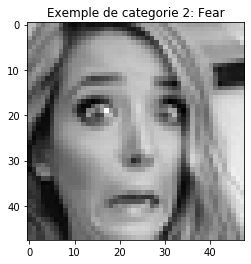

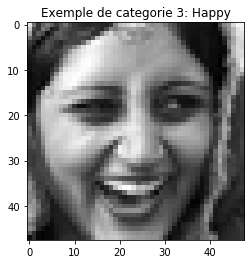

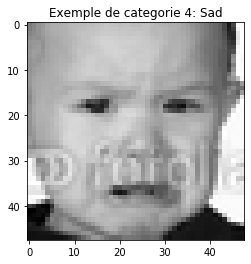

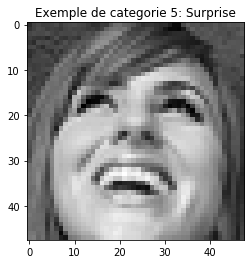

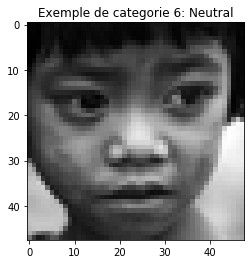

In [87]:
for cat in range(7):
    plt.figure(cat)
    idx = np.random.choice(df.index[df.emotion==cat])
    fer2013_show_instance(idx)
plt.show()

<p>La fonction <b><i>fer2013_to_4d_array</i></b> prend comme entree une dataframe qui tienne les donnees d'images mais en format des chaines de caracteres.<br>Elle retoune comme sortie un <b>np.array</b> de 4 dim, normalisee, utilisables pour <b>tensorflow<b> </p>

In [88]:
def fer2013_to_4d_array(d=df):
    """Transforms the (blank separated) pixel strings in the DataFrame to an 4-dimensional array 
    (1st dim: instances, 2nd and 3rd dims represent 2D image, 4th dim represent the color)."""
    
    pixels_list = d["pixels"].values
    list_image_2d = [string_to_image(pixels) for pixels in pixels_list]
    #for pixels in pixels_list:
        # single_image_2d = np.reshape(pixels.split(" "), (FER2013_WIDTH, FER2013_HEIGHT)).astype("float")
    #    single_image_2d = string_to_image(pixels)
    #    list_image_2d.append(single_image_2d)
        
    # Convert list to 4D array:
    X = np.expand_dims(np.array(list_image_2d), -1)
    print(f"The given data <pixel strings> has been converted to {X.shape} array")
    return X / 255

<p>On applique la fonction <b><i>fer2013_to_4d_array</i></b> sur les trois partitions</P>

In [89]:
X_train = fer2013_to_4d_array(df_training)
X_test = fer2013_to_4d_array(df_PrivateTest)
X_valid = fer2013_to_4d_array(df_PublicTest)

The given data <pixel strings> has been converted to (28709, 48, 48, 1) array
The given data <pixel strings> has been converted to (3589, 48, 48, 1) array
The given data <pixel strings> has been converted to (3589, 48, 48, 1) array


<p>La fonction <b><i>one_hot_label</i></b> prend comme entree une dataframe qui tienne les donnees d'emotions mais en format categoriel (7 classes).<br>Elle retoune comme sortie un <b>np.array</b> de 2 dim. Les classes sont reparties en 7 colonnes, une pour chaque, utilisables pour <b>tensorflow<b> </p>

In [90]:
def one_hot_labels(d):
    """Get one-hot encoded labels"""
    return pd.get_dummies(d.emotion).values

Y_train = one_hot_labels(df_training)
Y_test = one_hot_labels(df_PrivateTest)
Y_valid = one_hot_labels(df_PublicTest)
print(Y_train.shape, Y_test.shape, Y_valid.shape)

(28709, 7) (3589, 7) (3589, 7)


<p>On verifie simplement si les donnees sont normalise</p>

In [91]:
pd.DataFrame({'max':[np.max(X_train), np.max(X_test), np.max(X_valid)], 
              'mean':[np.mean(X_train), np.mean(X_test), np.mean(X_valid)],
              'min':[np.min(X_train), np.min(X_test), np.min(X_valid)]}, index=['train_set', 'test_set', 'validation_set'])

,max,mean,min
train_set,1.0,0.507743,0.0
test_set,1.0,0.506207,0.0
validation_set,1.0,0.505808,0.0


# Peut-on supprimer cette reshape? Il n'est pas necessaire.
* Let us reshape the images so that it's of size 48 x 48 x 1, and feed this as an input to the network.
* The reason you need to reshape your data is that Tensorflow expects a certain input shape for its Deep Learning Model, i.e., in this case, a Convolution Neural Network, specifically:


In [92]:
# I think our data has the same shape as needed, look at this: THERE IS NO DIFFERENCE AFTER RESHAPE
# Reshape training and testing image
X = X_train.reshape(-1, 48, 48, 1)
# X_test = X_test.reshape(-1, 48, 48, 1)
print(X.shape, X_train.shape)

(28709, 48, 48, 1) (28709, 48, 48, 1)


## The Deep Neural Network
* First, we will define the Convolutional neural networks architecture as follows:
* 1- The first hidden layer is a convolutional layer called a Convolution2D. We will use 32 filters with size 5×5 each.
* 2- Then a Max pooling layer with a pool size of 2×2.
* 3- Another convolutional layer with 64 filters with size 5×5 each.
* 4- Then a Max pooling layer with a pool size of 2×2.
* 5- Then next is a Flatten layer that converts the 2D matrix data to a 1D vector before building the fully connected layers.
* 6- After that we will use a fully connected layer with 1024 neurons and relu activation function.
* 7- Then we will use a regularization layer called Dropout. It is configured to randomly exclude 20% of neurons in the layer in order to reduce overfitting.
* 8- Finally, the output layer which has 10 neurons for the 10 classes and a softmax activation function to output probability-like predictions for each class.

## Step 1 – Create a model:
* Keras first creates a new instance of a model object and then add layers to it one after the another. It is called a sequential model API. We can add layers to the neural network just by calling model.add and passing in the type of layer we want to add. Finally, we will compile the model with two important information, loss function, and cost optimization algorithm.

In [93]:
# Creating a Sequential Model and adding the layers
input_shape = (48, 48, 1)
model = Sequential()
#first layer
model.add(Conv2D(32, kernel_size=(5,5), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
#second layer
model.add(Conv2D(64, kernel_size=(5,5), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(64, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(7,activation=tf.nn.softmax))

## Network Parameters
* Next, you need to define the network parameters. Firstly, you define the number of inputs. This is 2304 since the image is initially loaded as a 2304-dimensional vector. Later, you will see that how you will reshape the 2304-dimensional vector to a 48 x 48 x 1 matrix. Secondly, you'll also define the number of classes, which is nothing else than the number of class labels.here 7

In [95]:
#Compile the model
optimizer = 'adam'
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

<p>Vu global du modele</p>

In [96]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 44, 44, 32)        832       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 18, 18, 64)        51264     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 9, 9, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 5184)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                331840    
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)               

<p>Execute le processu d'apprentissage</p>

In [97]:
l = model.fit(x=X_train, y=Y_train, validation_data = (X_test, Y_test), batch_size=50, epochs=10)

Train on 28709 samples, validate on 3589 samples
Epoch 1/10
28709/28709 [==============================] - 73s 3ms/step - loss: 1.6391 - accuracy: 0.3557 - val_loss: 1.4692 - val_accuracy: 0.4310
Epoch 2/10
28709/28709 [==============================] - 53s 2ms/step - loss: 1.4579 - accuracy: 0.4377 - val_loss: 1.4119 - val_accuracy: 0.4531
Epoch 3/10
28709/28709 [==============================] - 51s 2ms/step - loss: 1.3667 - accuracy: 0.4758 - val_loss: 1.3439 - val_accuracy: 0.4795
Epoch 4/10
28709/28709 [==============================] - 52s 2ms/step - loss: 1.2922 - accuracy: 0.5051 - val_loss: 1.3348 - val_accuracy: 0.4882
Epoch 5/10
28709/28709 [==============================] - 52s 2ms/step - loss: 1.2284 - accuracy: 0.5323 - val_loss: 1.3087 - val_accuracy: 0.5038
Epoch 6/10
28709/28709 [==============================] - 52s 2ms/step - loss: 1.1574 - accuracy: 0.5567 - val_loss: 1.2946 - val_accuracy: 0.5052
Epoch 7/10
28709/28709 [==============================] - 51s 2ms/ste

## Evaluate Model

In [98]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test and on validation data")
results_1 = model.evaluate(X_test, Y_test)
results_2 = model.evaluate(X_valid, Y_valid)
print("test loss, test acc:", results_1)
print("validation loss, validation acc:", results_2)

Evaluate on test and on validation data
3589/3589 [==============================] - 2s 451us/step
test loss, test acc: [1.4325283507046576, 0.5146280527114868]
validation loss, validation acc: [1.4471950892719196, 0.5157425403594971]


In [99]:
l.history

{'val_loss': [1.4692068784540495,
  1.4119175726339723,
  1.3439327209697989,
  1.3347653534858133,
  1.3087056875561034,
  1.2946197986270631,
  1.3354287942029135,
  1.3847376117469807,
  1.3886811543587159,
  1.4325283856802447],
 'val_accuracy': [0.4310392737388611,
  0.45305100083351135,
  0.4795207679271698,
  0.488158255815506,
  0.5037614703178406,
  0.5051546096801758,
  0.508776843547821,
  0.4937308430671692,
  0.5118417143821716,
  0.5146280527114868],
 'loss': [1.6390575218517922,
  1.457877209042136,
  1.3666578281460986,
  1.292163132408735,
  1.2284176270164264,
  1.157352302846683,
  1.0853362954594241,
  1.0112384605621145,
  0.934045381828213,
  0.8682990045735005],
 'accuracy': [0.35570726,
  0.43770248,
  0.47584382,
  0.50510293,
  0.5323418,
  0.55672437,
  0.5891184,
  0.6189,
  0.6468355,
  0.6719844]}

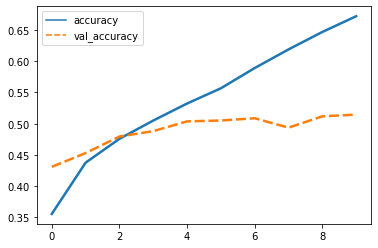

In [100]:
import seaborn as sns
df_history = pd.DataFrame(l.history)
sns.lineplot(data=df_history[['accuracy','val_accuracy']], palette="tab10", linewidth=2.5);

In [59]:
# load test data and make prediction
y_pred = model.predict(X_test)

In [60]:
# convert prediction to df
submission = pd.DataFrame(data=y_pred)

# set label as the 0-6 class with highest value 
submission['Label'] = submission.idxmax(axis=1)
submission['ImageId'] = np.asarray([i+1 for i in range(submission.shape[0])])

In [61]:
submission.head()

,0,1,2,3,4,5,6,Label,ImageId
0,0.287484,0.030371,0.358116,0.013572,0.055808,0.162065,0.092583,2,1
1,0.454132,0.008309,0.036726,0.035954,0.441771,0.016031,0.007076,0,2
2,0.005195,0.000002,0.474847,0.055557,0.201029,0.006194,0.257176,2,3
3,0.007271,0.029387,0.082307,0.013905,0.250665,0.023715,0.592749,6,4
4,0.040250,0.037023,0.165503,0.007750,0.642747,0.001577,0.105149,4,5


In [62]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(submission['Label'],df_PrivateTest['emotion'])

In [63]:
print(pd.DataFrame(cm))

     0   1    2    3    4    5    6
0  216  20   88   63  103   14   69
1    1  15    1    1    0    0    0
2   55   8  160   42   72   51   42
3   51   2   46  646   74   25   67
4   76   9  100   52  220   16   98
5   25   0   67   24   23  296   32
6   67   1   66   51  102   14  318


## Data Augmentation

In [64]:
# data augmentation
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(featurewise_center=False,
                        featurewise_std_normalization=False,
                        rotation_range=10,
                        width_shift_range=0.1,
                        height_shift_range=0.1,
                        zoom_range=.1,
                        horizontal_flip=True,
                        vertical_flip=False)

In [66]:
L1 = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=50),epochs = 20, 
                                  validation_data = (X_test,Y_test),verbose = 1, 
                                  steps_per_epoch = X.shape[0] / 100,)

Epoch 1/20
288/287 [==============================] - 23s 80ms/step - loss: 1.6529 - accuracy: 0.3637 - val_loss: 1.3295 - val_accuracy: 0.4787
Epoch 2/20
288/287 [==============================] - 23s 80ms/step - loss: 1.5645 - accuracy: 0.3987 - val_loss: 1.3033 - val_accuracy: 0.4909
Epoch 3/20
288/287 [==============================] - 22s 78ms/step - loss: 1.5196 - accuracy: 0.4060 - val_loss: 1.2759 - val_accuracy: 0.5029
Epoch 4/20
288/287 [==============================] - 24s 82ms/step - loss: 1.5074 - accuracy: 0.4145 - val_loss: 1.2635 - val_accuracy: 0.5107
Epoch 5/20
288/287 [==============================] - 25s 86ms/step - loss: 1.4909 - accuracy: 0.4222 - val_loss: 1.2657 - val_accuracy: 0.5021
Epoch 6/20
288/287 [==============================] - 24s 83ms/step - loss: 1.4772 - accuracy: 0.4286 - val_loss: 1.2776 - val_accuracy: 0.5035
Epoch 7/20
288/287 [==============================] - 23s 80ms/step - loss: 1.4638 - accuracy: 0.4376 - val_loss: 1.2647 - val_accuracy:

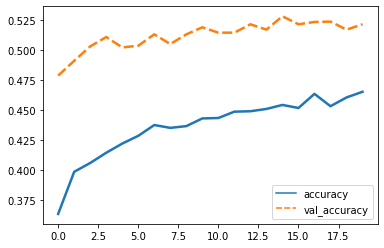

In [67]:
import seaborn as sns
df_history1 = pd.DataFrame(L1.history)
sns.lineplot(data=df_history1[['accuracy','val_accuracy']], palette="tab10", linewidth=2.5);

In [68]:
# example of horizontal flip image augmentation
from numpy import expand_dims
from keras.preprocessing.image import img_to_array
from matplotlib import pyplot
# convert to numpy array

Neutral


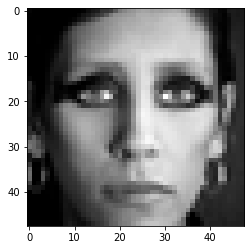

In [69]:

image_sample = np.reshape(df_training.at[4, "pixels"].split(" "), (FER2013_WIDTH, FER2013_HEIGHT)).astype("float")
plt.imshow(image_sample, cmap="gray")
print(Emotions[df_training.at[4, "emotion"]])

In [70]:
image_sample= image_sample.reshape(-1, 48, 48, 1)
image_sample.shape

(1, 48, 48, 1)

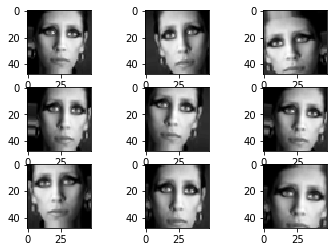

In [71]:
# create image data augmentation generator
datagen = ImageDataGenerator(featurewise_center=False,
                        featurewise_std_normalization=False,
                        rotation_range=10,
                        width_shift_range=0.1,
                        height_shift_range=0.1,
                        zoom_range=.1,
                        horizontal_flip=True,
                        vertical_flip=False)
# prepare iterator
it = datagen.flow(image_sample, batch_size=1)
# generate samples and plot
image =[]
for i in range(9):
    pyplot.subplot(330 + 1 + i)
    batch = it.next()
    image = batch[0].astype('uint8').reshape(48,48)
    plt.imshow(image,cmap="gray")
plt.show()

In [73]:
# serialize model to JSON
model_json = model.to_json()
projet_dir = "C:\\Users\\jeang\\Documents\\BDEB\\A62\\ProSyn3"
with open('\\'.join([projet_dir, 'fer.json']), "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
# model.save_weights("C:\\Users\\Nisha Haulkhory\\projet de synthese\\GIT\\ProSyn3\\fer.h5")
model.save_weights('\\'.join([projet_dir, "fer.h5"]))
print("Saved model to disk")

Saved model to disk
